# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS
## Week 7 - Waves

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

## Waves in 1D

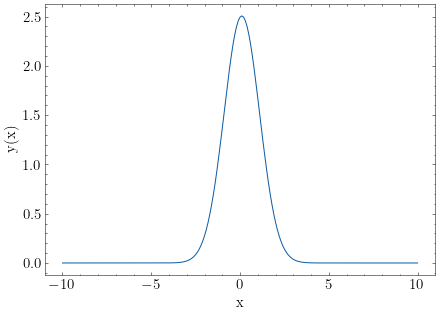

In [67]:
# Gaussian pulse

def pulse(x, mu = 0.0, sigma = 1.0):
    return (1/sigma*np.sqrt(2*np.pi))*np.exp(-0.5*(x - mu)**2 / sigma**2)

dx = 0.1
x = np.arange(-10, 10+dx, dx)

plt.plot(x, pulse(x, mu=0.1, sigma=1.0))
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

In [15]:
# Wave propagation

v = 1.0

dx = 0.1
x = np.arange(-10, 10+dx, dx)

dt = dx/v
t = np.arange(0, 10+dt, dt)

Nx = len(x)
Nt = len(t)

u = np.zeros((Nt, Nx))

In [16]:
# Setting initial conditions for v=0 at t=0

u[0] = pulse(x)
u[1] = pulse(x)

# Dirichlet boundaries

u[0][0] = 0.0
u[0][-1] = 0.0

u[1][0] = 0.0
u[1][-1] = 0.0

In [19]:
for n in range(1,99):
    for k in range(1, len(x)-1):
        u[n+1][k] = u[n][k+1] + u[n][k-1] - u[n-1][k] 

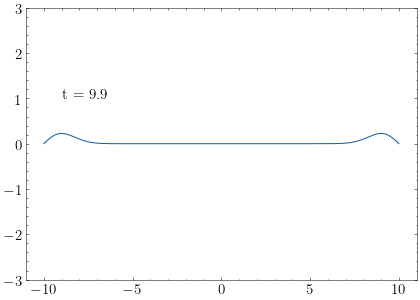

In [33]:
# Doing a simple animation with display

from IPython import display
from time import sleep

for i in range(100):
    plt.plot(x, u[i])
    plt.text(-9, 1.0, f"t = {t[i]:.1f}")
    display.clear_output(wait=True)
    plt.ylim(-3.0, 3.0)
    plt.show()  

In [59]:
# Animating with matplotlib.animate

fig = plt.figure(dpi=100)

def animate(frame):
    fig.clear()
    plt.plot(x, u[frame])
    plt.text(-9, 2.0, f"t = {t[frame]:.1f}")
    plt.ylim(-3.0, 3.0)
    plt.xlim(-10.1, 10.1)
    plt.xlabel('x')
    plt.title('Gaussian pulse with zero velocity')
    plt.draw()
    
anim = FuncAnimation(fig, animate, frames=Nt, interval=dt*1000)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [65]:
# Setting initial velocity v = 1

u = np.zeros((Nt, Nx))

u[0] = pulse(x, mu=0.0)
u[1] = pulse(x, mu=0.1)

# Dirichlet boundaries

u[0][0] = 0.0
u[0][-1] = 0.0

u[1][0] = 0.0
u[1][-1] = 0.0

for n in range(1,99):
    for k in range(1, len(x)-1):
        u[n+1][k] = u[n][k+1] + u[n][k-1] - u[n-1][k]
        
# Animating with matplotlib.animate

fig = plt.figure(figsize=(6,5),dpi=100)

def animate(frame):
    fig.clear()
    plt.plot(x, u[frame])
    plt.text(-9, 2.0, f"t = {t[frame]:.1f}")
    plt.ylim(-3.0, 3.0)
    plt.xlim(-10.1, 10.1)
    plt.xlabel('x')
    plt.title('Gaussian pulse with v = 1')
    plt.draw()
    
anim = FuncAnimation(fig, animate, frames=Nt, interval=dt*1000)
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)
plt.close()

In [73]:
# Laplace's equation

V = np.zeros((10,10))
V[:,0] = 1.0

for n in range(100):
    V_last = V.copy()
    

In [75]:
V[1:-1, 1:-1]

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])